# Assessing the dependence of the fitted parameters on truncation mass

This example shows the dependence of the fitted MRP parameters (for both Curve and PerObject data) on the choice of truncation mass. Fitting different types of samples with different truncation masses is covered.

** The plot from this example can be found in MRP Appendix C **

In [2]:
#Imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from hmf import MassFunction

from mrpy.fit_curve import get_fit_curve
from mrpy.fit_perobj import PerObjFit

We choose to use the halo samples, and accompanying EPS fit from Ishiyama+15. See the example ``fit_simulation_suite.ipynb`` in this directory for how to download and prepare the simulated data used here.

Using these allow us to perform the fits with two methods, in which each should roughly correspond to the other.

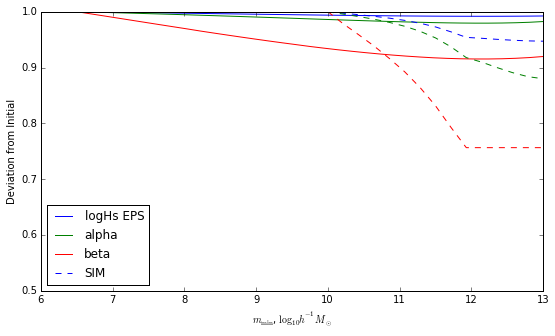

In [9]:
#### PARAMETERS
z = 0
OmegaM=0.3168
H0=67.04
Sigma8=0.8347
rhob=OmegaM*2.7755e11
mmax = 15.7
mmins = np.linspace(6.5,13,35)

# Construct the EPS mass function
hmf = MassFunction(z=z,cosmo_params={"Om0":OmegaM,"H0":H0},sigma_8=Sigma8,
                   hmf_model="Ishiyama",Mmax=mmax,Mmin=mmins.min(),cut_fit=False,
                   transfer_params={"transfer__kmax":200.0},lnk_min=-15,lnk_max=15,
                   dlnk=0.001)


# Calculate the best parameters for Curve data
par = np.zeros((len(mmins),3))
for i,mmin in enumerate(mmins):
    dndm = hmf.dndm[hmf.M>10**mmin]
    m = hmf.M[hmf.M>10**mmin]
    par[i,:] = get_fit_curve(m,dndm)[0].x[:3]

# Plot Curve data
plt.figure(figsize=(9,5))
plt.plot(mmins,par[:,0]/par[0,0],label="logHs EPS",color="b")
plt.plot(mmins,par[:,1]/par[0,1],label="alpha",color="g")
plt.plot(mmins,par[:,2]/par[0,2],label="beta",color="r")

# Get unique masses from nu^2
data = np.genfromtxt("n2gc/n2gc-m_z0.fof.compact")
mmins_sim=np.linspace(10,13,15)
par_obj = np.zeros((len(mmins_sim),3))
for i,mmin in enumerate(mmins_sim):
    mask = data[:,0]>10**mmin
    fitobj = PerObjFit(data[mask,0],data[mask,1],weight_scale=1,hs_bounds=(10,16),beta_bounds=(0.4,1.0))
    par_obj[i,:] = fitobj.run_downhill()[0].x
    
# Plot the PerObj results
plt.plot(mmins_sim,par_obj[:,0]/par_obj[0,0],label="SIM",ls="--",color="b")
plt.plot(mmins_sim,par_obj[:,1]/par_obj[0,1],ls="--",color="g")
plt.plot(mmins_sim,par_obj[:,2]/par_obj[0,2],ls="--",color="r")

# Axis Styling
plt.legend(loc=0)
plt.xlabel(r"$m_{\rm min}$, $\log_{10}h^{-1}M_\odot$")
plt.ylabel("Deviation from Initial")
plt.ylim((0.5,1.0))
plt.savefig('../../mrpArticle/figures/dependence_on_mmin_sim.pdf')